In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
output_file = '../videos/video_1_sim2_output.csv'
output_df = pd.read_csv(output_file, delimiter=';', header=[3])

In [4]:
output_df

,Frame,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,145,579.725426,191.736566,546.903857,170.551050,527.453259,187.463639,500.591479,152.956878,474.880307,190.602196,459.814156,165.296593,0.107,True,InterTrial
1,222,626.637087,256.503277,609.877964,243.944665,580.888708,257.419977,567.316045,219.403107,533.870693,243.811944,523.180044,212.918479,0.285,True,InterTrial
2,225,631.856368,262.971916,615.627596,244.151848,583.028078,257.907542,568.898324,220.306769,563.595278,262.397135,529.883051,226.863761,0.450,True,InterTrial
3,228,633.637468,273.270504,612.061910,242.975094,607.111917,265.891526,568.808036,221.328507,563.231353,261.401926,536.920733,231.840720,0.632,True,InterTrial
4,231,631.201340,281.507390,612.099794,244.479317,605.293973,265.909087,570.271779,222.240352,563.961155,262.432913,539.050606,232.052752,0.811,True,InterTrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,5385,218.696502,669.378425,777.235322,565.072719,760.448380,577.564639,766.638858,529.814495,720.073110,557.158384,729.461771,507.243690,310.395,True,InterTrial
1723,5388,216.804909,671.270655,776.004999,568.217417,761.645114,579.097592,766.033042,529.453907,721.796083,557.747666,732.945871,500.052213,310.576,True,InterTrial
1724,5391,218.056965,672.277496,771.711598,567.761610,749.137354,570.309241,766.648348,529.238001,721.911118,555.674948,735.353086,494.966792,310.755,True,InterTrial
1725,5394,734.584564,577.438136,767.843134,565.623852,747.749770,571.581207,766.256984,529.035545,731.695506,536.837244,739.136540,492.968702,310.935,True,InterTrial


### filter only since experiment start

In [5]:
output_pose = np.array([output_df.loc[output_df['Unnamed: 14'] == True].iloc[:, c] for c in np.arange(1, 13)]).T
output_pose

array([[579.72542575, 191.73656559, 546.90385735, ..., 190.6021955 ,
        459.81415598, 165.29659319],
       [626.63708746, 256.5032773 , 609.87796426, ..., 243.81194358,
        523.18004429, 212.91847873],
       [631.85636759, 262.97191572, 615.62759614, ..., 262.3971355 ,
        529.88305116, 226.86376059],
       ...,
       [218.05696499, 672.27749562, 771.71159783, ..., 555.67494825,
        735.35308647, 494.96679163],
       [734.58456421, 577.43813634, 767.84313416, ..., 536.83724356,
        739.13653952, 492.96870208],
       [719.49165535, 569.61101103, 752.5167942 , ..., 537.06853628,
        741.24710798, 490.54168367]])

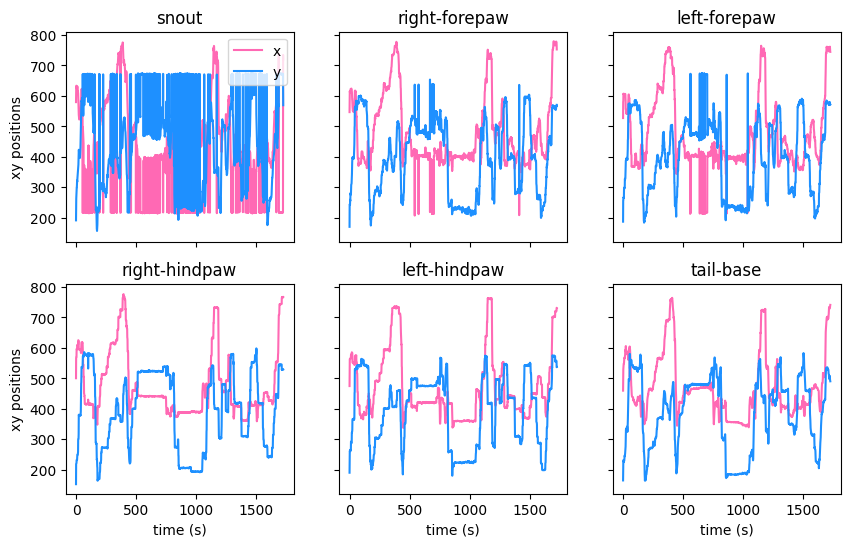

In [6]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(output_pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(output_pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(output_pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



In [14]:
np.save('../processed_data/output_pose2.npy', output_pose)

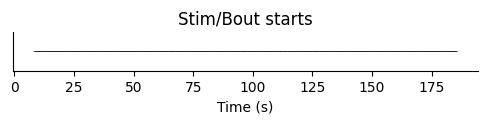

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 0.5))
ax.plot(output_df['Frame'].loc[output_df['Unnamed: 14'] == True]/30,
        np.ones_like(output_df['Frame'].loc[output_df['Unnamed: 14'] == True]/30),
        ls='', marker='|', markersize=0.2, c='k', alpha=1)
ax.set_yticks([])
ax.set_title('Stim/Bout starts')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()

In [7]:
onset_times = np.load('../processed_data/onset_times2.npy')

In [8]:
onset_times

array([[  7.10892129],
       [  8.92413712],
       [ 10.75962305],
       [ 13.93112397],
       [ 16.90207863],
       [ 17.80288529],
       [ 18.35635257],
       [ 18.71674418],
       [ 19.25791717],
       [ 32.8086791 ],
       [ 35.21708417],
       [ 37.87174916],
       [ 42.92725253],
       [ 44.38546968],
       [ 45.25557089],
       [ 51.99293637],
       [ 54.47997499],
       [ 66.57653761],
       [ 70.48385906],
       [ 77.49090338],
       [ 78.40317225],
       [ 82.84502506],
       [ 83.38559079],
       [ 83.92389202],
       [ 85.3052845 ],
       [ 85.62160587],
       [ 88.50295568],
       [ 89.97225642],
       [ 91.06802464],
       [ 99.54387665],
       [137.85655355],
       [142.10198808],
       [144.03735161],
       [147.54712176],
       [150.90650678],
       [153.94446063],
       [196.39519143],
       [202.89093137],
       [203.42920971],
       [205.6214304 ],
       [209.58223414],
       [213.18054628],
       [213.87009287],
       [220

In [9]:
def find_nearest(array, value):
    array = np.asarray(array)
    # print(array)
    idx = (np.abs(array - value)).argmin()
    return idx


In [12]:
real_onsets_ls = []
# exp_start_frame = output_df.loc[output_df['Unnamed: 14'] == True]['Frame'].iloc[0]
for onset_time in onset_times:
    closest_idx = find_nearest(output_df['Unnamed: 13'], onset_time)
    # print(closest_idx)
    real_onsets_ls.append(output_df['Frame'][closest_idx])
    

In [13]:
np.array(real_onsets_ls)/30

array([ 11.2,  12.2,  13.2,  15. ,  16.6,  17.1,  17.4,  17.6,  17.9,
        25.4,  26.7,  28.2,  31. ,  31.8,  32.3,  36. ,  37.3,  44. ,
        46.2,  50.1,  50.6,  53.1,  53.4,  53.7,  54.4,  54.6,  56.2,
        57. ,  57.6,  62.3,  83.5,  85.8,  86.9,  88.9,  90.7,  92.4,
       116. , 119.6, 119.9, 121.1, 123.3, 125.3, 125.7, 129.6, 132.1,
       135.7, 137.8, 139.2, 139.6, 141.4, 142.3, 142.6, 142.9, 148.5,
       156.2, 156.6, 161.1, 161.8, 162.6, 166.5, 167. , 167.9, 170.3,
       175.1, 175.7, 176.1, 179.4, 179.8])

In [38]:
output_df['Unnamed: 13']

0         0.076
1         0.212
2         0.348
3         0.483
4         0.618
         ...   
1781    320.475
1782    320.619
1783    320.774
1784    320.922
1785    321.087
Name: Unnamed: 13, Length: 1786, dtype: float64

In [55]:
onset_times

array([[  5.5063324 ],
       [ 10.37359571],
       [ 11.07834077],
       [ 24.54595494],
       [ 25.80758095],
       [ 26.70770502],
       [ 29.58102131],
       [ 34.45055914],
       [ 36.77969241],
       [ 43.61634421],
       [ 46.12221956],
       [ 58.01275253],
       [ 61.77102995],
       [ 68.98609185],
       [ 69.6915009 ],
       [ 74.25853992],
       [ 74.79936886],
       [ 75.31132936],
       [ 76.55790043],
       [ 77.099159  ],
       [ 79.80464816],
       [ 80.88646412],
       [ 81.24685717],
       [ 82.47924876],
       [ 87.51222491],
       [ 90.75294256],
       [128.96767306],
       [132.91482377],
       [134.35600352],
       [135.07510495],
       [138.66151524],
       [139.02135849],
       [141.90899181],
       [144.79158902],
       [187.32403994],
       [194.64782023],
       [196.97985721],
       [197.50335097],
       [200.92834473],
       [204.53650284],
       [205.07594824],
       [212.28463984],
       [216.77431917],
       [223